In [2]:
import os
raw_data_path=os.path.join(os.path.pardir,'day.csv')
raw_data_path

'..\\day.csv'

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
# import the dataset
df=pd.read_csv(raw_data_path)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.columns=['Instant', 'Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday',
       'Workingday', 'Weather Situation', 'Temp', 'Actual Temp', 'Humidity', 'WindSpeed',
       'Casual', 'Registered', 'Count']

In [10]:
df.head()

,Instant,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather Situation,Temp,Actual Temp,Humidity,WindSpeed,Casual,Registered,Count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratory Data Analysis

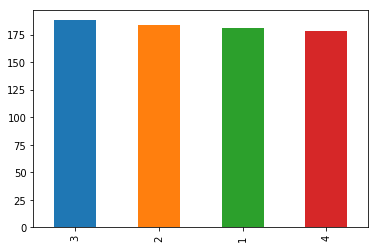

In [11]:
df.Season.value_counts().plot(kind='bar')

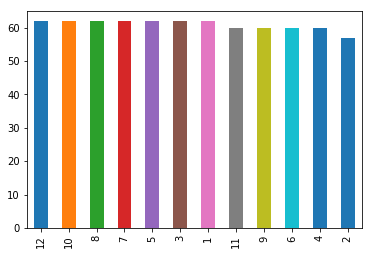

In [12]:
df.Month.value_counts().plot(kind='bar')

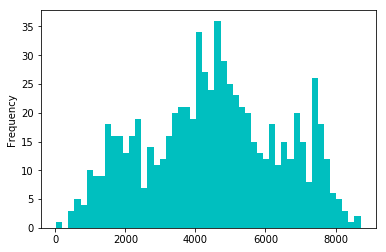

In [13]:
df.Count.plot(kind='hist',bins=50,color='c')

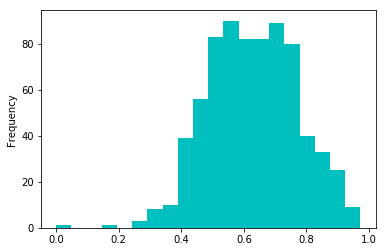

In [14]:
df.Humidity.plot(kind='hist',bins=20,color='c')

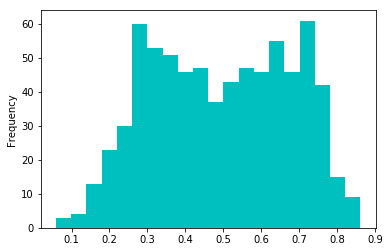

In [15]:
df.Temp.plot(kind='hist',bins=20,color='c')

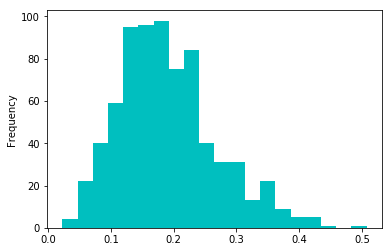

In [16]:
df.WindSpeed.plot(kind='hist',bins=20,color='c')

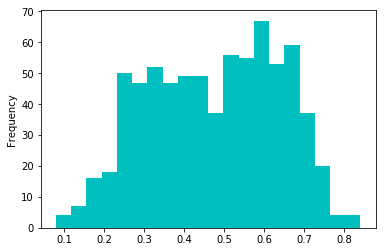

In [17]:
df['Actual Temp'].plot(kind='hist',bins=20,color='c')

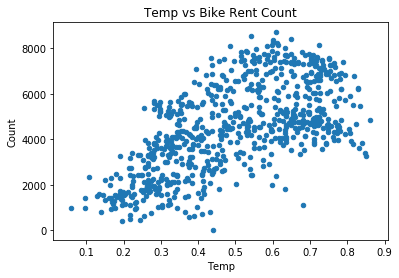

In [18]:
df.plot.scatter(x='Temp',y='Count',title='Temp vs Bike Rent Count')


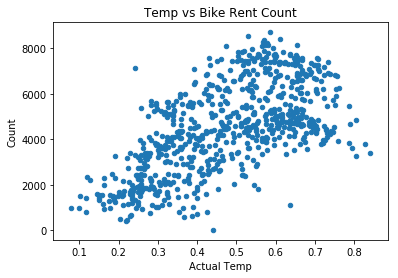

In [19]:
df.plot.scatter(x='Actual Temp',y='Count',title='Temp vs Bike Rent Count')


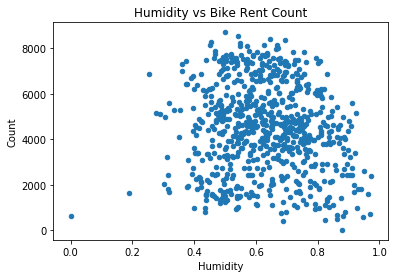

In [20]:
df.plot.scatter(x='Humidity',y='Count',title='Humidity vs Bike Rent Count')


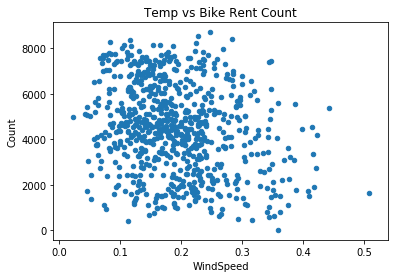

In [21]:
df.plot.scatter(x='WindSpeed',y='Count',title='Temp vs Bike Rent Count')


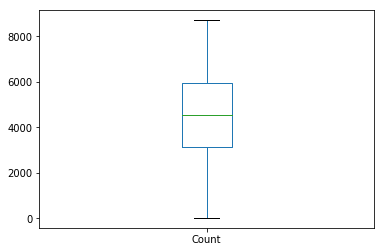

In [22]:
df.Count.plot.box()


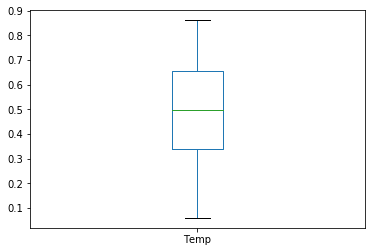

In [23]:
df.Temp.plot.box()


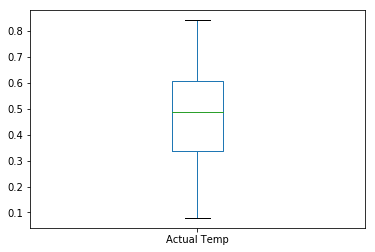

In [24]:
df['Actual Temp'].plot.box()


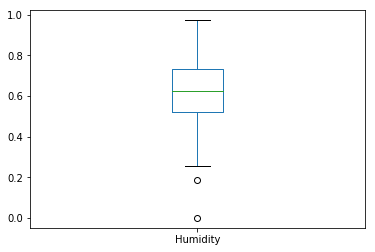

In [25]:
df.Humidity.plot.box()


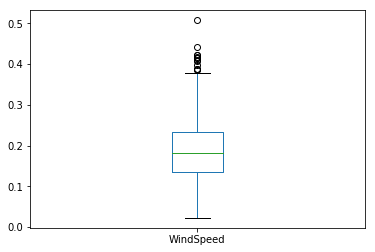

In [28]:
df.WindSpeed.plot.box()


In [35]:
# fixing the outliers by converting them to NA and then imputing their value
df.loc[df.Humidity<(df.Humidity.quantile(0.25)-1.5*(df.Humidity.quantile(0.75)-df.Humidity.quantile(0.25))),'Humidity'] = np.nan
df.loc[df.WindSpeed>(df.WindSpeed.quantile(0.75)+1.5*(df.WindSpeed.quantile(0.75)-df.WindSpeed.quantile(0.25))),'WindSpeed'] = np.nan


In [ ]:
df_new=df.iloc[:,]

In [ ]:
from fancyimpute import KNN
df_knn = pd.DataFrame(KNN(k = 5).complete(df), columns = df.columns)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
Instant              731 non-null int64
Date                 731 non-null object
Season               731 non-null int64
Year                 731 non-null int64
Month                731 non-null int64
Holiday              731 non-null int64
Weekday              731 non-null int64
Workingday           731 non-null int64
Weather Situation    731 non-null int64
Temp                 731 non-null float64
Actual Temp          731 non-null float64
Humidity             729 non-null float64
WindSpeed            714 non-null float64
Casual               731 non-null int64
Registered           731 non-null int64
Count                731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [33]:
# ! pip install fancyimpute

In [34]:


df['WindSpeed'] = df['WindSpeed'].fillna(df['WindSpeed'].mean())

df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())



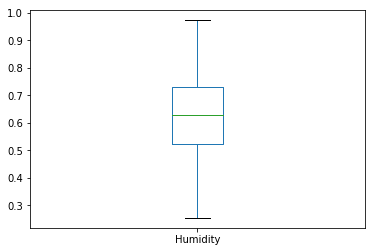

In [35]:
df.Humidity.plot.box()


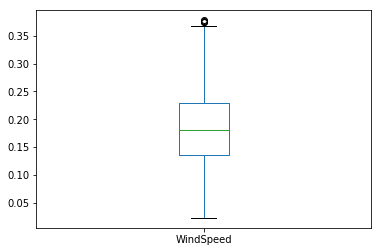

In [36]:
df.WindSpeed.plot.box()


In [37]:
df.loc[df.WindSpeed>(df.WindSpeed.quantile(0.75)+1.5*(df.WindSpeed.quantile(0.75)-df.WindSpeed.quantile(0.25))),'WindSpeed'] = np.nan
df['WindSpeed'] = df['WindSpeed'].fillna(df['WindSpeed'].mean())

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant              731 non-null int64
Date                 731 non-null object
Season               731 non-null int64
Year                 731 non-null int64
Month                731 non-null int64
Holiday              731 non-null int64
Weekday              731 non-null int64
Workingday           731 non-null int64
Weather Situation    731 non-null int64
Temp                 731 non-null float64
Actual Temp          731 non-null float64
Humidity             731 non-null float64
WindSpeed            731 non-null float64
Casual               731 non-null int64
Registered           731 non-null int64
Count                731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


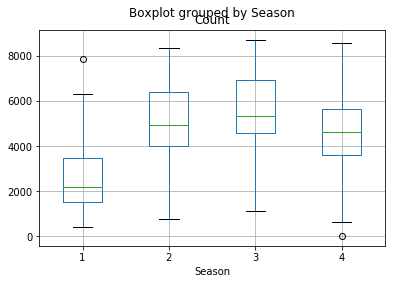

In [39]:
df.boxplot('Count','Season')

In [40]:
d=df[df.Season==4]
d[d.Count<100]

,instant,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather Situation,Temp,Actual Temp,Humidity,WindSpeed,Casual,Registered,Count
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


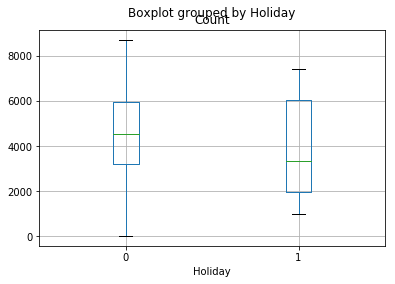

In [41]:
df.boxplot('Count','Holiday')

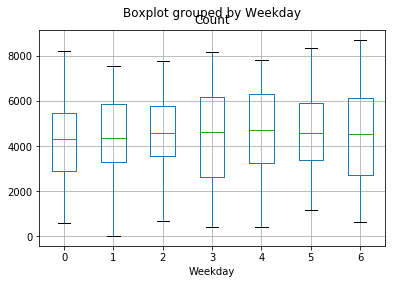

In [42]:
df.boxplot('Count','Weekday')

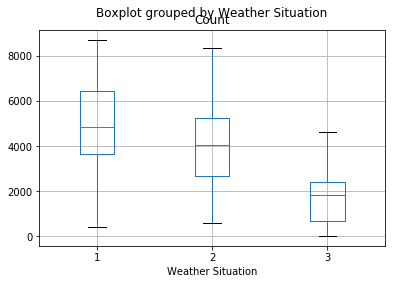

In [43]:
df.boxplot('Count','Weather Situation')

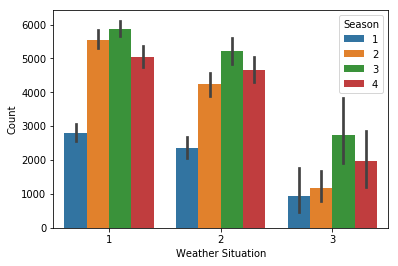

In [55]:
import seaborn as sns
sns.barplot(x='Weather Situation',y='Count',data=new_df,hue='Season')

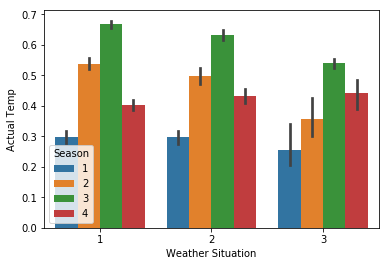

In [56]:
# new_df['Month']=df['Month']
sns.barplot(x='Weather Situation',y='Actual Temp',data=new_df,hue='Season')

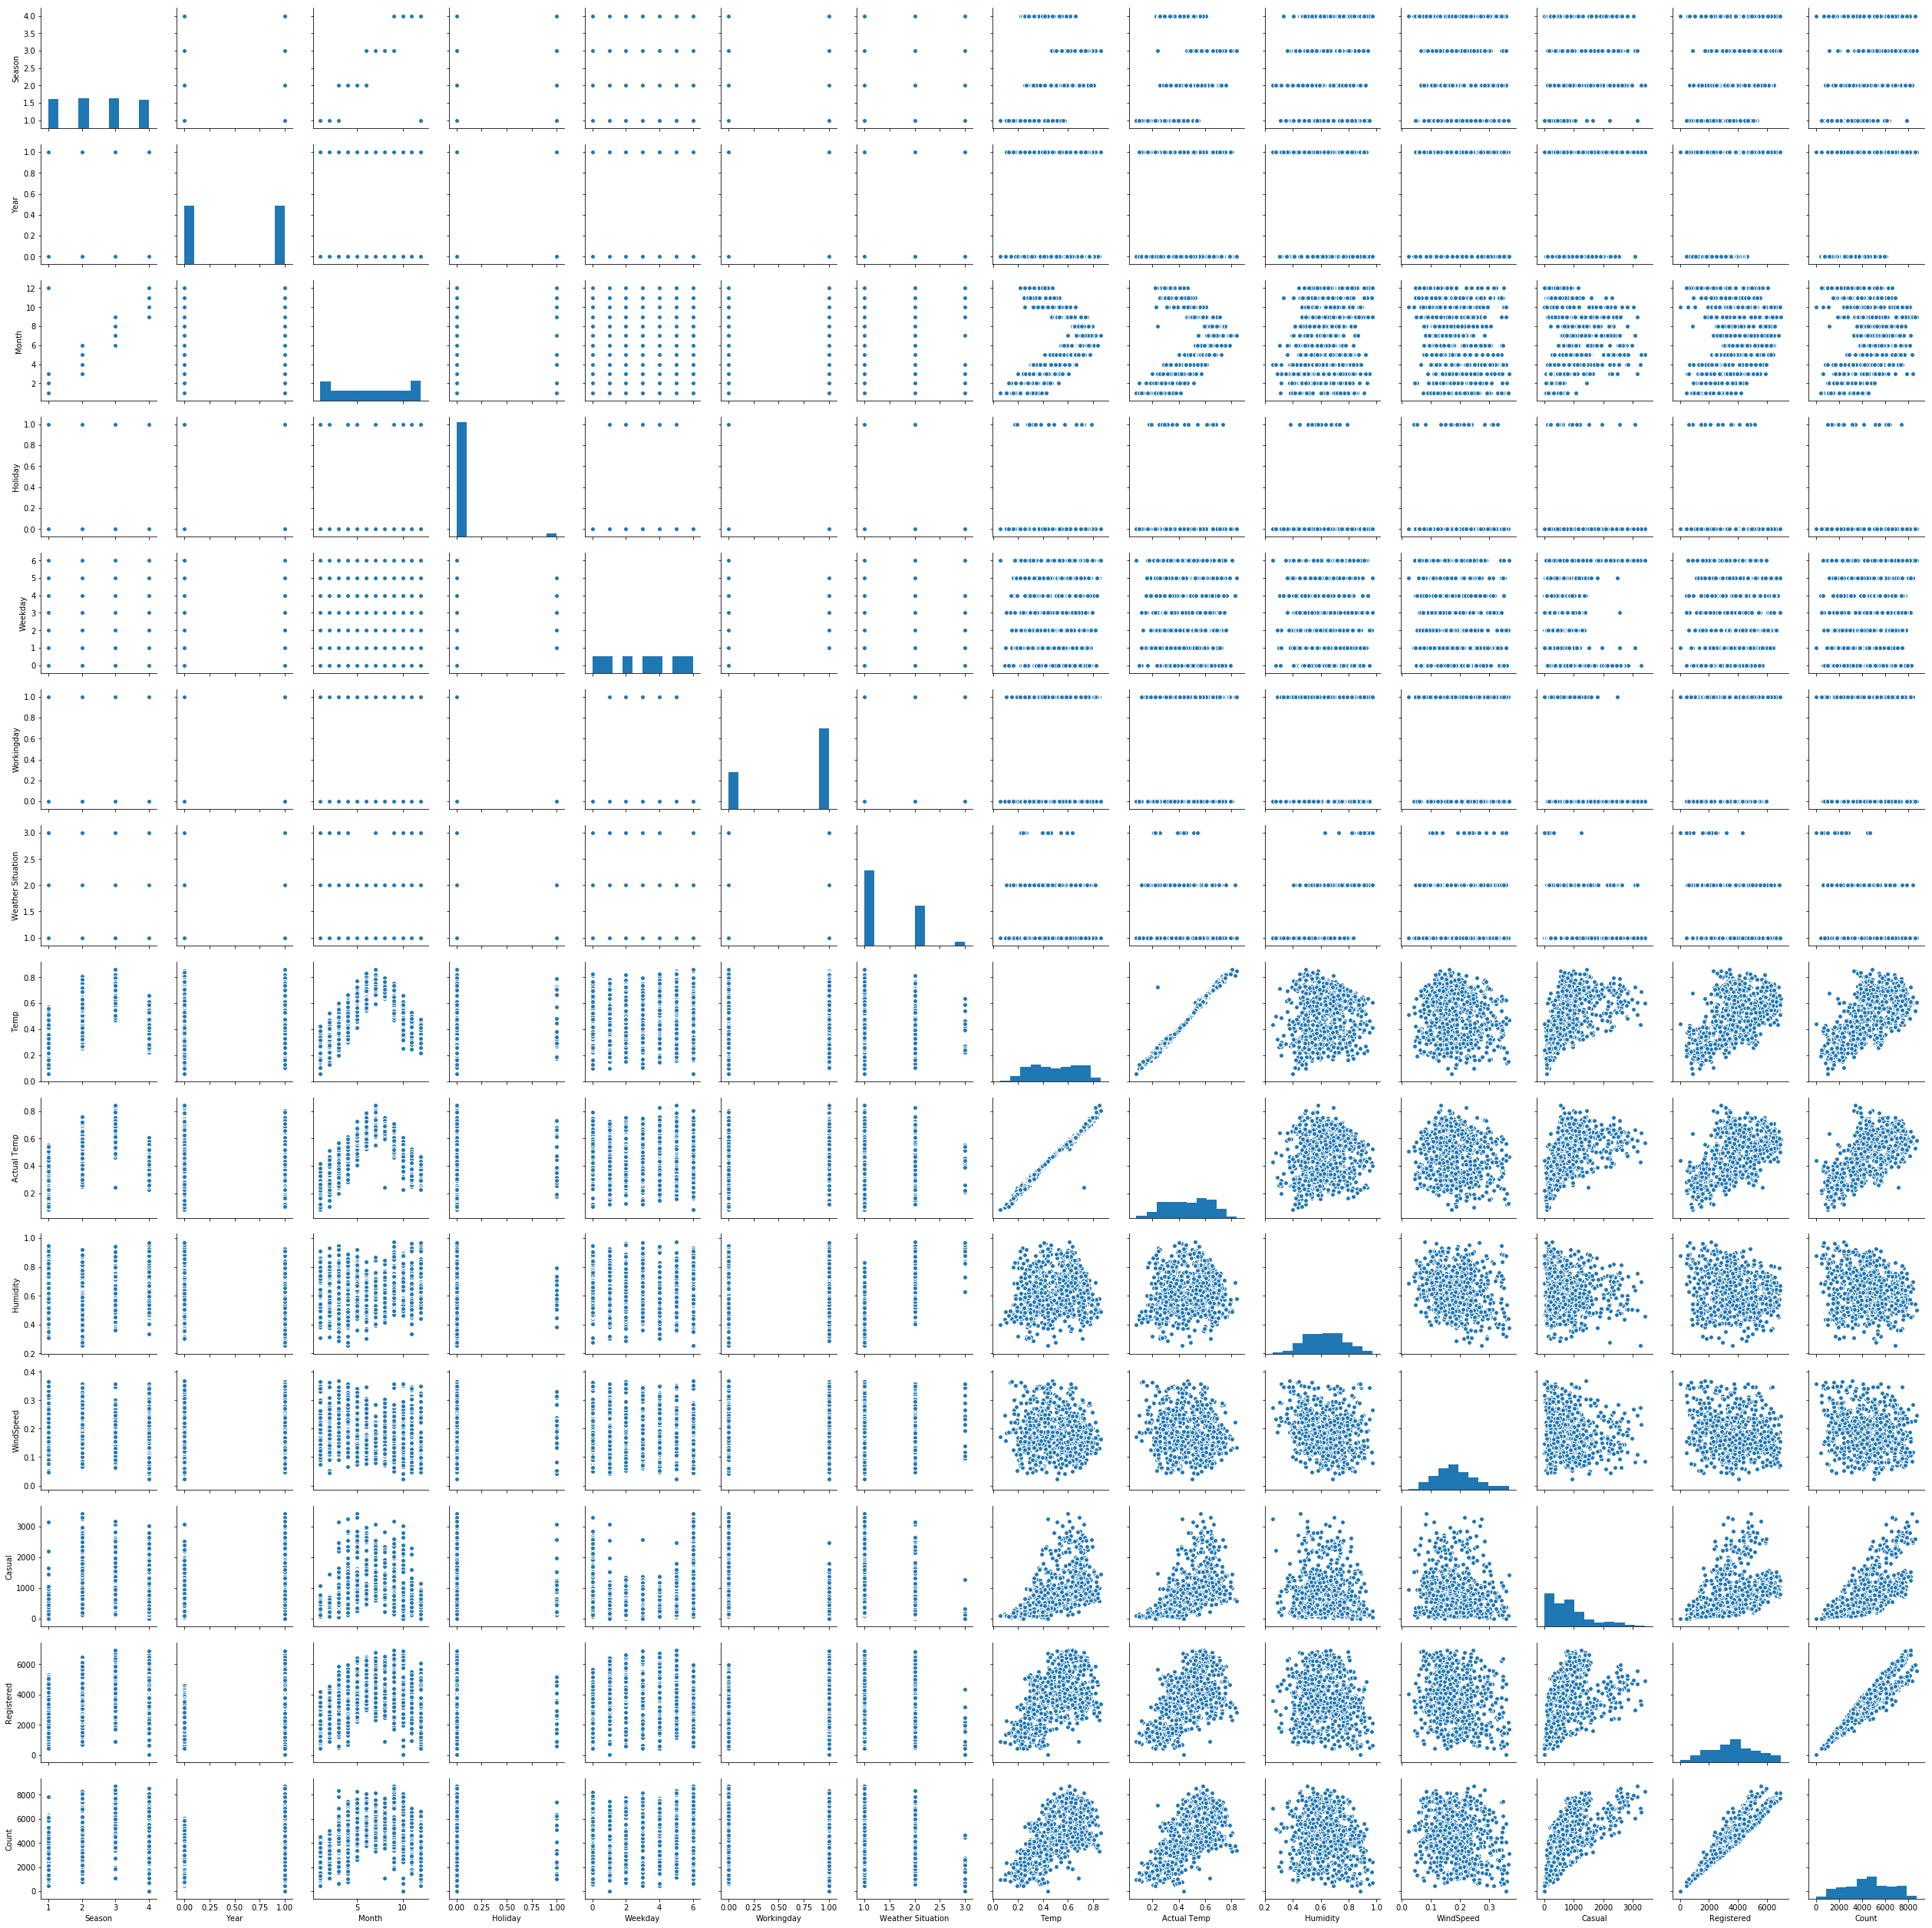

In [57]:
sns.pairplot(new_df)

In [47]:
df.kurtosis()

instant              -1.200000
Season               -1.342601
Year                 -2.005487
Month                -1.209112
Holiday              30.052462
Weekday              -1.254282
Workingday           -1.374686
Weather Situation    -0.136467
Temp                 -1.118864
Actual Temp          -0.985131
Humidity             -0.520615
WindSpeed            -0.225420
Casual                1.322074
Registered           -0.713097
Count                -0.811922
dtype: float64

In [48]:
df.skew()

instant              0.000000
Season              -0.000384
Year                -0.002742
Month               -0.008149
Holiday              5.654224
Weekday              0.002742
Workingday          -0.793147
Weather Situation    0.957385
Temp                -0.054521
Actual Temp         -0.131088
Humidity             0.062373
WindSpeed            0.402912
Casual               1.266454
Registered           0.043659
Count               -0.047353
dtype: float64

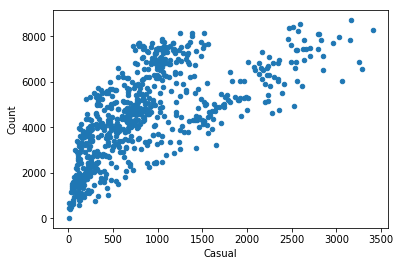

In [49]:
df.plot.scatter(x='Casual',y='Count')

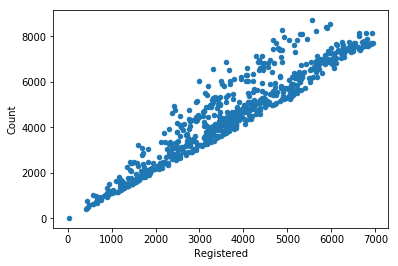

In [50]:
df.plot.scatter(x='Registered',y='Count')

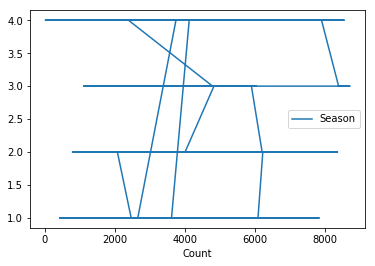

In [51]:
df.plot.line(x='Count',y='Season')

In [52]:
import matplotlib.pyplot as plt

In [115]:
df['Temp Bins']=pd.qcut(df.Temp,4,labels=['low','medium','high','very high'])

In [118]:
df['Temp Bins'].value_counts()

KeyError: 'Temp Bins'

In [53]:
new_df=df.drop(['instant','Date'],axis=1,inplace=False)

In [54]:
new_df.iloc[:,7:].head()

,Temp,Actual Temp,Humidity,WindSpeed,Casual,Registered,Count
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [122]:
new_df.iloc[:,7:].corr()

,Temp,Actual Temp,Humidity,WindSpeed,Casual,Registered,Count
Temp,1.000000,0.991702,0.123703,-0.134140,0.543285,0.540012,0.627494
Actual Temp,0.991702,1.000000,0.137293,-0.157985,0.543864,0.544192,0.631066
Humidity,0.123703,0.137293,1.000000,-0.200585,-0.087800,-0.112238,-0.121518
WindSpeed,-0.134140,-0.157985,-0.200585,1.000000,-0.137674,-0.194901,-0.205773
Casual,0.543285,0.543864,-0.087800,-0.137674,1.000000,0.395282,0.672804
Registered,0.540012,0.544192,-0.112238,-0.194901,0.395282,1.000000,0.945517
Count,0.627494,0.631066,-0.121518,-0.205773,0.672804,0.945517,1.000000


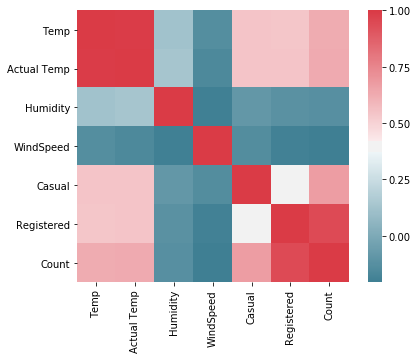

In [58]:
import seaborn as sns
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = new_df.iloc[:,7:].corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

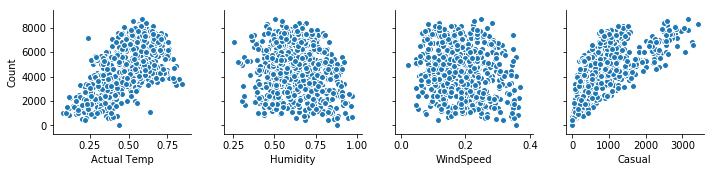

In [136]:
sns.pairplot(new_df,x_vars=new_df.iloc[:,7:-1].columns,y_vars=['Count'])

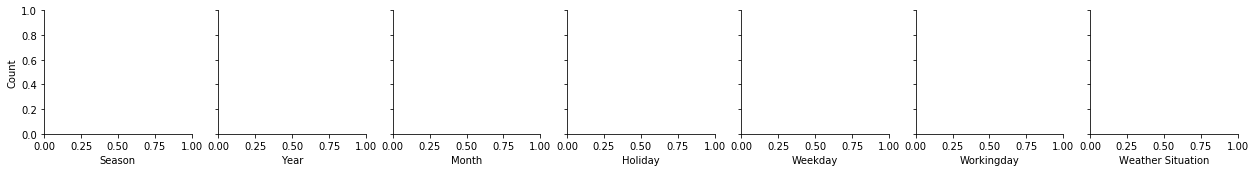

In [139]:
sns.pairplot(new_df,x_vars=new_df.iloc[:,:7].columns,y_vars=['Count'],kind='boxplot')

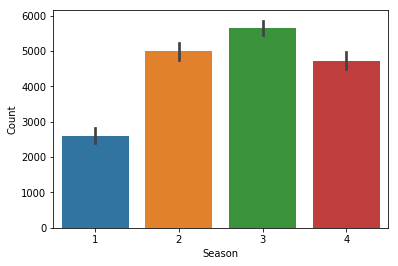

In [83]:
sns.barplot(x='Season',y='Count',data=new_df)

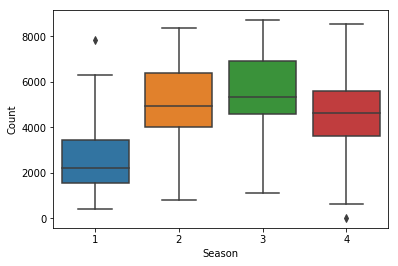

In [140]:
sns.boxplot(x='Season',y='Count',data=new_df)

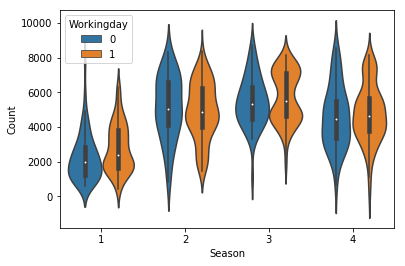

In [89]:
sns.violinplot(x='Season',y='Count',data=new_df,hue='Workingday')

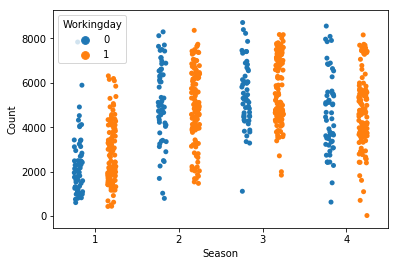

In [92]:
sns.stripplot(x='Season',y='Count',data=new_df,hue='Workingday',jitter=True,dodge=True)

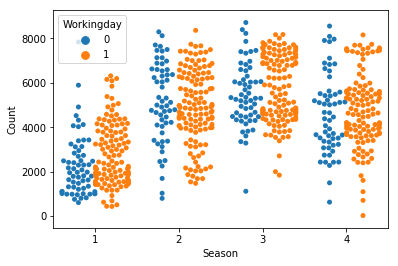

In [94]:
sns.swarmplot(x='Season',y='Count',data=new_df,hue='Workingday',dodge=True)

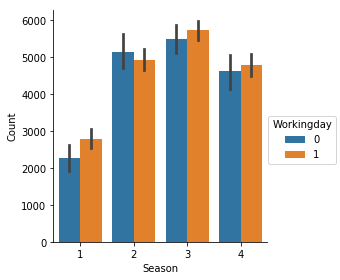

In [95]:
sns.factorplot(x='Season',y='Count',data=new_df,hue='Workingday',kind='bar')

C:\Users\ya391860\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ya391860\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


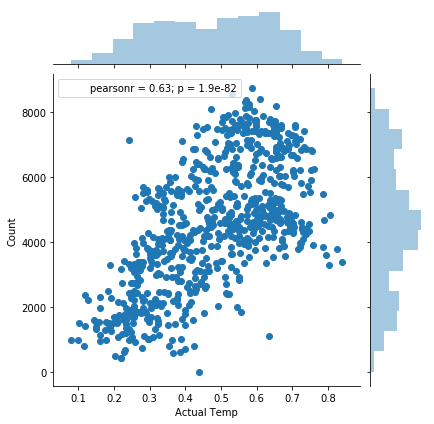

In [103]:
sns.jointplot(x='Actual Temp',y='Count',data=new_df)

In [141]:
cnames=['Month','Temp','Date','Casual','Registered']

In [59]:
new_df=df.drop(['Temp','Date','Registered','instant'],axis=1,inplace=False)

In [60]:
new_df.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather Situation,Actual Temp,Humidity,WindSpeed,Casual,Count
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,331,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,131,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,120,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,108,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,82,1600


In [61]:
X=new_df.iloc[:,:-1].values
y=new_df.iloc[:,-1].values

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

# Linear Model

In [70]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)
y_pred=lr_model.predict(X_test)

In [74]:

np.median(df['Count'])

4548.0

In [69]:
lr_model.rank_


11

In [64]:
from sklearn.linear_model import RANSACRegressor
elr_model=RANSACRegressor()
elr_model.fit(X_train,y_train)
elr_model.score(X_test,y_test)

0.8578683524632387

# Decision Tree Regressor

In [157]:
import sklearn.tree as t
from sklearn.tree import DecisionTreeRegressor
dtr_model=t.DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)
dtr_model.score(X_test,y_test)

0.8376292035034338

# ExtraTreeRegressor

In [158]:
etr_model=t.ExtraTreeRegressor()
etr_model.fit(X_train,y_train)
etr_model.score(X_test,y_test)

0.8055648080566593

# Random Forest Regressor

In [1]:
import sklearn.ensemble as ens
rf_model=ens.RandomForestRegressor(n_estimators=50)
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

NameError: name 'X_train' is not defined

In [160]:
ab_model=ens.AdaBoostRegressor()
ab_model.fit(X_train,y_train)
ab_model.score(X_test,y_test)

0.8070509439763482

In [149]:
ab_model=ens.BaggingRegressor()
ab_model.fit(X_train,y_train)
ab_model.score(X_test,y_test)


0.8279655850955492

In [150]:
ab_model=ens.GradientBoostingRegressor()
ab_model.fit(X_train,y_train)
ab_model.score(X_test,y_test)

0.8668954175100542

In [151]:
from sklearn import svm 

In [152]:
sv_model=svm.SVR()
sv_model.fit(X_train,y_train)
sv_model.score(X_test,y_test)

0.021627145532006065

In [136]:
X_test.shape

(147, 11)

In [153]:
print(y_train.mean(),y_test.mean())

4490.67294520548 4558.680272108843


0.0